In [ ]:
This is a template (in developement) for an unified analysi

In [1]:
import analysis_tools as atool
from matplotlib import pyplot as plt
import numpy as np

Read and initialize the test result as a "TestResults" object

In [2]:
tname = "example_result.txt"
tr = atool.TestResults(tname)

analysis_tools.py:197: RuntimeWarning: invalid value encountered in greater
  swapmask = diffVLSR1 > diffVLSR2


Plot the confusion matrix for the test results, for all pixels

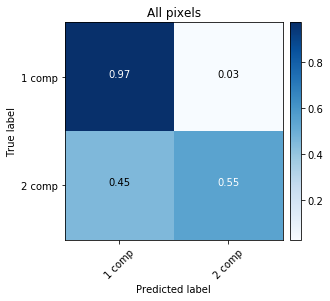

In [3]:
tr.plot_cmatrix()

Now plot the confusion matrices binned by SNR values

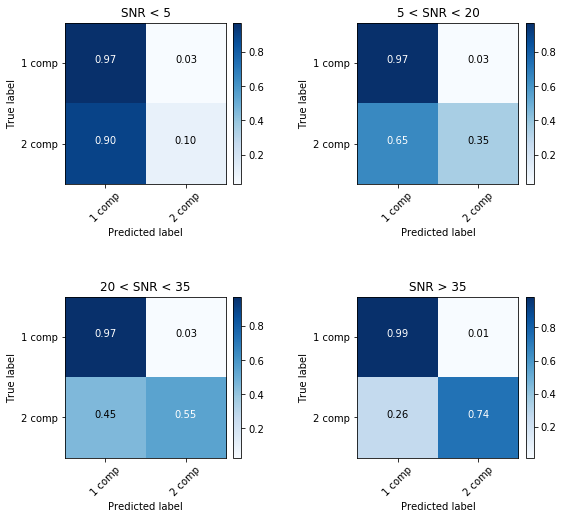

In [4]:
tr.plot_cmatrix_wZBins(Z_Key='snr', bin_edges=(5,20,35), qname="SNR", ncols=2, figsize=(10, 8))

Plot the success rate of the true positive identification of two components as a function of true velocity seperation of the two components

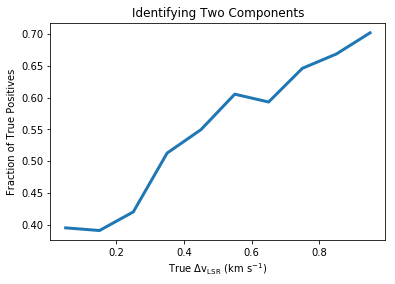

In [5]:
figsize=(6,4)
fig, ax = plt.subplots(1, 1, figsize=figsize)
ax.set_title('Identifying Two Components')
ax.set_ylabel('Fraction of True Positives')
ax.set_xlabel('True $\Delta \mathrm{v}_\mathrm{LSR}$ (km s$^{-1}$)')
tr.plot_success_rate('true_vsep', ax=ax)

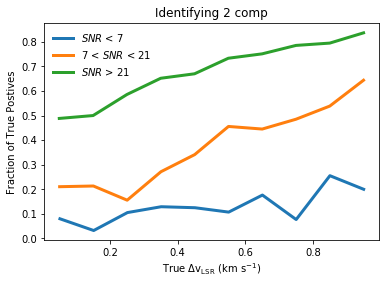

In [6]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
bin_edges = [7,21]
qname = "$SNR$"
ax.set_title('Identifying 2 comp')
ax.set_xlabel('True $\Delta \mathrm{v}_\mathrm{LSR}$ (km s$^{-1}$)')
tr.plot_success_rate_wZBins('true_vsep', 'snr', bin_edges, bins=10, qname=qname, ax=ax)

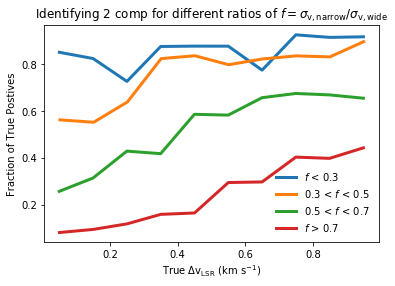

In [7]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
bin_edges = [0.3, 0.5, 0.7]
qname = "$f$"
ax.set_title('Identifying 2 comp for different ratios of $f=\sigma_{\mathrm{v,narrow}}/\sigma_{\mathrm{v,wide}}$')
ax.set_xlabel('True $\Delta \mathrm{v}_\mathrm{LSR}$ (km s$^{-1}$)')
tr.plot_success_rate_wZBins('true_vsep', 'sig_ratio', bin_edges, bins=10, qname=qname, ax=ax)

Plot the true error of the fitted vlsr for true postive one component fits

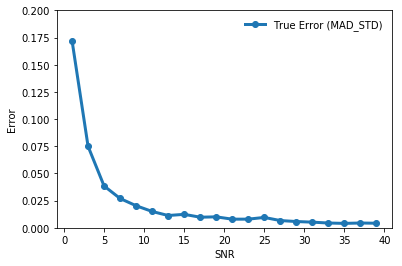

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.set_ylim((0,0.2))
tr.plot_error('snr', 'true_vErr1', bins=20, range=(0,40), ax=ax, mask = tr.mask_1v_truepos)

Plot the true error of the fitted vlsr for true postive two component fits

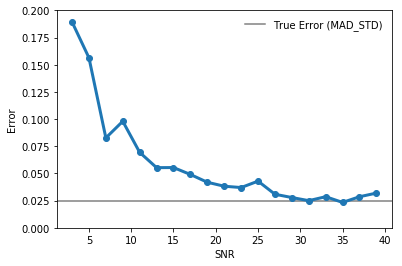

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.axhline(0.025, c="0.5")
ax.set_ylim((0,0.2))
tr.plot_error(['snr','snr'], ['true_vErr1','true_vErr2'], bins=20, range=(0,40), mask = tr.mask_2v_truepos, ax=ax)